## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import advanced_lane_line_helper_functions as aahlpf
import lane_lines_helper_functions as llhlpf

In [2]:
# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

In [3]:
print(images)

['camera_cal\\calibration1.jpg', 'camera_cal\\calibration10.jpg', 'camera_cal\\calibration11.jpg', 'camera_cal\\calibration12.jpg', 'camera_cal\\calibration13.jpg', 'camera_cal\\calibration14.jpg', 'camera_cal\\calibration15.jpg', 'camera_cal\\calibration16.jpg', 'camera_cal\\calibration17.jpg', 'camera_cal\\calibration18.jpg', 'camera_cal\\calibration19.jpg', 'camera_cal\\calibration2.jpg', 'camera_cal\\calibration20.jpg', 'camera_cal\\calibration3.jpg', 'camera_cal\\calibration4.jpg', 'camera_cal\\calibration5.jpg', 'camera_cal\\calibration6.jpg', 'camera_cal\\calibration7.jpg', 'camera_cal\\calibration8.jpg', 'camera_cal\\calibration9.jpg']


(720, 1280, 3)


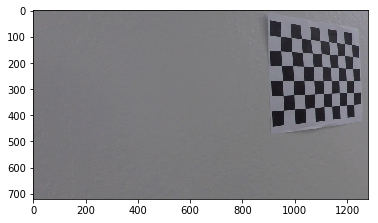

In [4]:
img = cv2.imread(images[7])
rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(rgb_img.shape)
plt.imshow(rgb_img)

---
## Compute the camera calibration matrix and distortion coefficients given a set of chessboard images

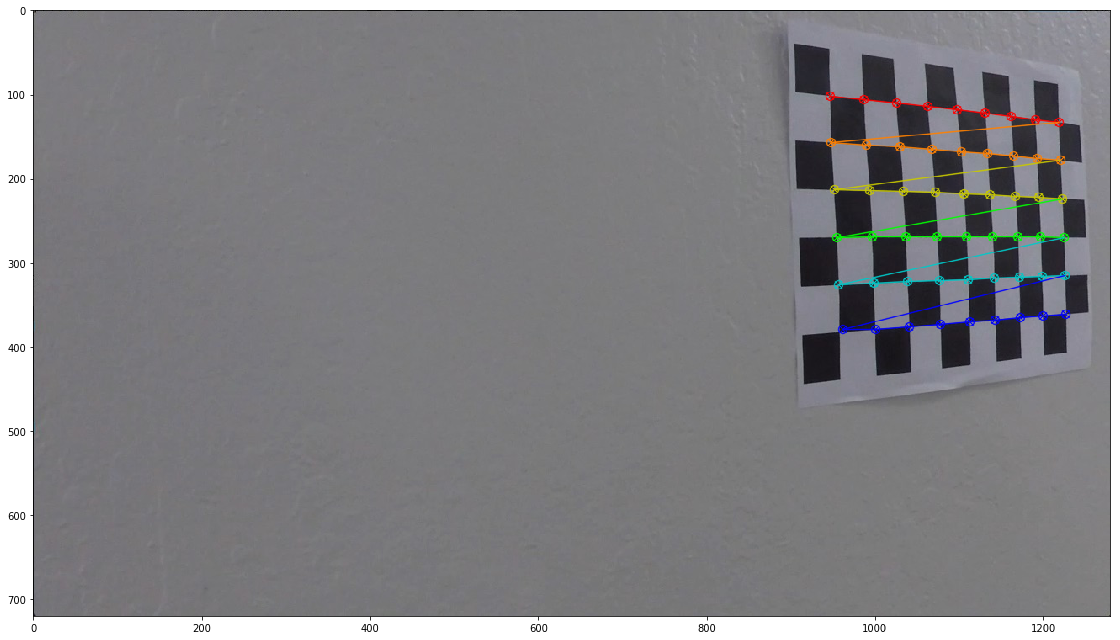

In [5]:
# prepare object points
nx = 9 # enter the number of inside corners in x
ny = 6 # enter the number of inside corners in y

# Make a list of calibration images
img = cv2.imread(images[7])

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # plt.imshow(img)
    
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.imshow(rgb_img)
    plt.tight_layout()

In [6]:
# fig.savefig('output_images/calibration_find_corners.jpg')

In [7]:
'''
save_img = cv2.imread('output_images/calibration_find_corners.jpg')
f, ax = plt.subplots(1, 1, figsize=(24, 9))
f.tight_layout()
ax.imshow(cv2.cvtColor(save_img,cv2.COLOR_BGR2RGB))
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
'''

"\nsave_img = cv2.imread('output_images/calibration_find_corners.jpg')\nf, ax = plt.subplots(1, 1, figsize=(24, 9))\nf.tight_layout()\nax.imshow(cv2.cvtColor(save_img,cv2.COLOR_BGR2RGB))\nplt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)\n"

In [8]:
imgpoints, objpoints = aahlpf.find_cal_pts(images, nx=9, ny=6)

In [9]:
# Read in each image
img = cv2.imread(images[7])

# Convert image to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints,
                                                   gray.shape[::-1], None, None)

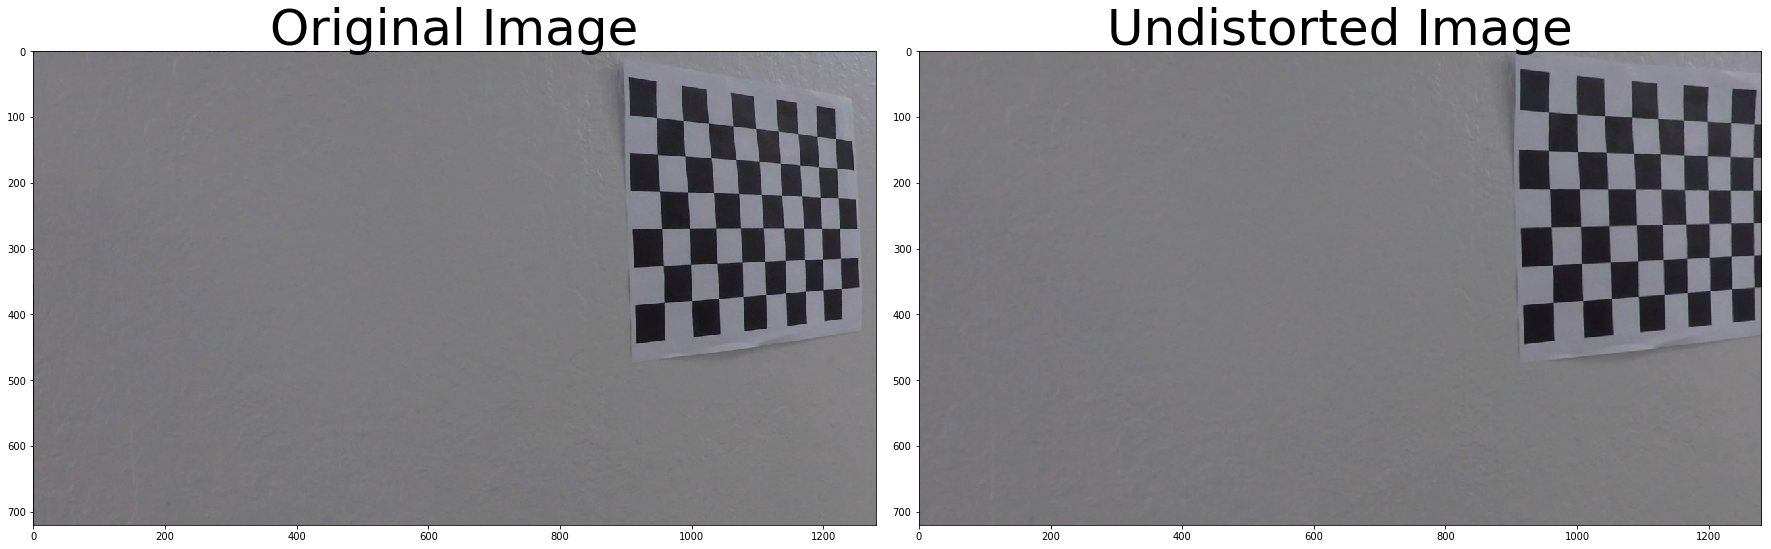

In [10]:
# Read in each image
img = cv2.imread(images[7])

undist = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(cv2.cvtColor(undist,cv2.COLOR_BGR2RGB))
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [11]:
# f.savefig('output_images/calibration_distort_correct.jpg')

In [12]:
'''
save_img = cv2.imread('output_images/calibration_distort_correct.jpg')
f, ax = plt.subplots(1, 1, figsize=(24, 9))
f.tight_layout()
ax.imshow(cv2.cvtColor(save_img,cv2.COLOR_BGR2RGB))
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
'''

"\nsave_img = cv2.imread('output_images/calibration_distort_correct.jpg')\nf, ax = plt.subplots(1, 1, figsize=(24, 9))\nf.tight_layout()\nax.imshow(cv2.cvtColor(save_img,cv2.COLOR_BGR2RGB))\nplt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)\n"

---
## Apply a distortion correction to raw images

In [13]:
# Make a list of calibration images
lane_images = glob.glob('test_images/*.jpg')

In [14]:
print(len(lane_images))
print(lane_images)

8
['test_images\\straight_lines1.jpg', 'test_images\\straight_lines2.jpg', 'test_images\\test1.jpg', 'test_images\\test2.jpg', 'test_images\\test3.jpg', 'test_images\\test4.jpg', 'test_images\\test5.jpg', 'test_images\\test6.jpg']


In [15]:
im_num = 4
lane_image = mpimg.imread(lane_images[im_num])
print(lane_images[im_num])
print(lane_image.shape)
# plt.imshow(lane_image)

test_images\test3.jpg
(720, 1280, 3)


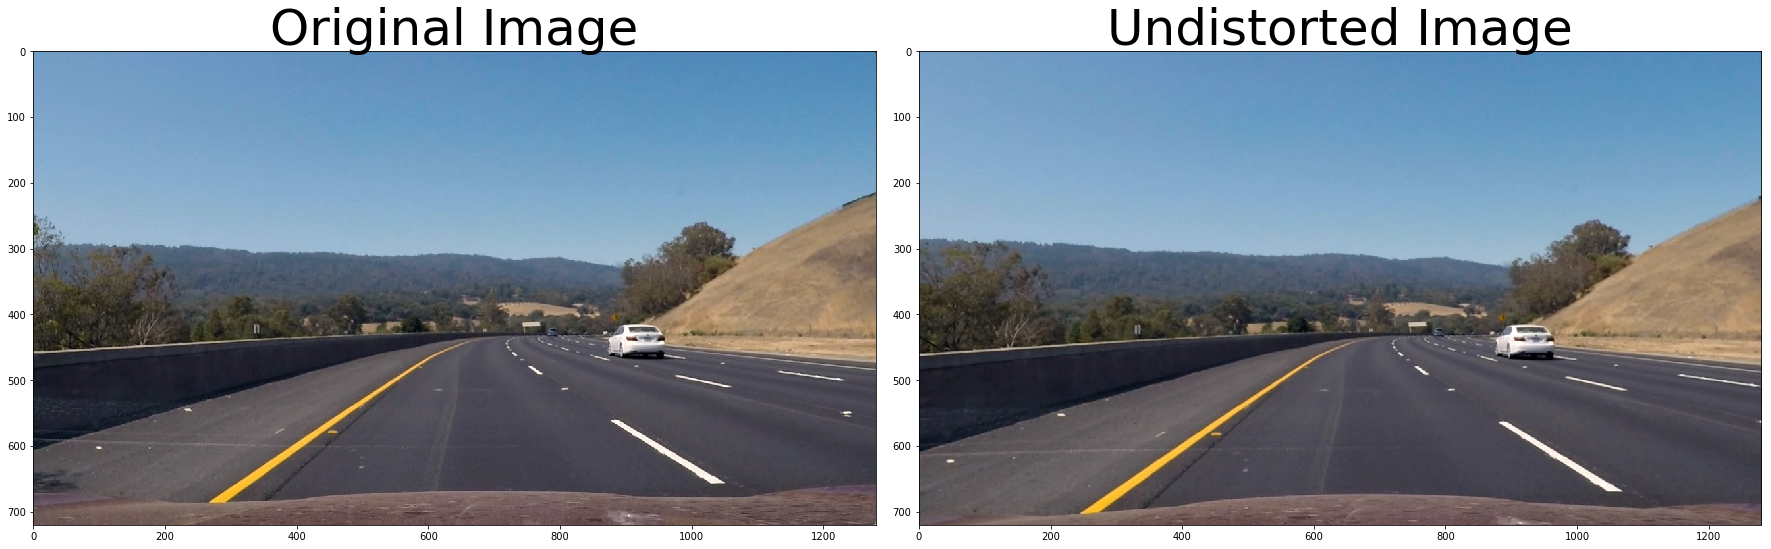

In [16]:
lane_undist = cv2.undistort(lane_image, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(lane_image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(lane_undist)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [17]:
# f.savefig('output_images/test5_distort_correct.jpg')

---
## Use color transforms, gradients, etc., to create a thresholded binary image

In [18]:
result = aahlpf.pipeline(lane_undist)

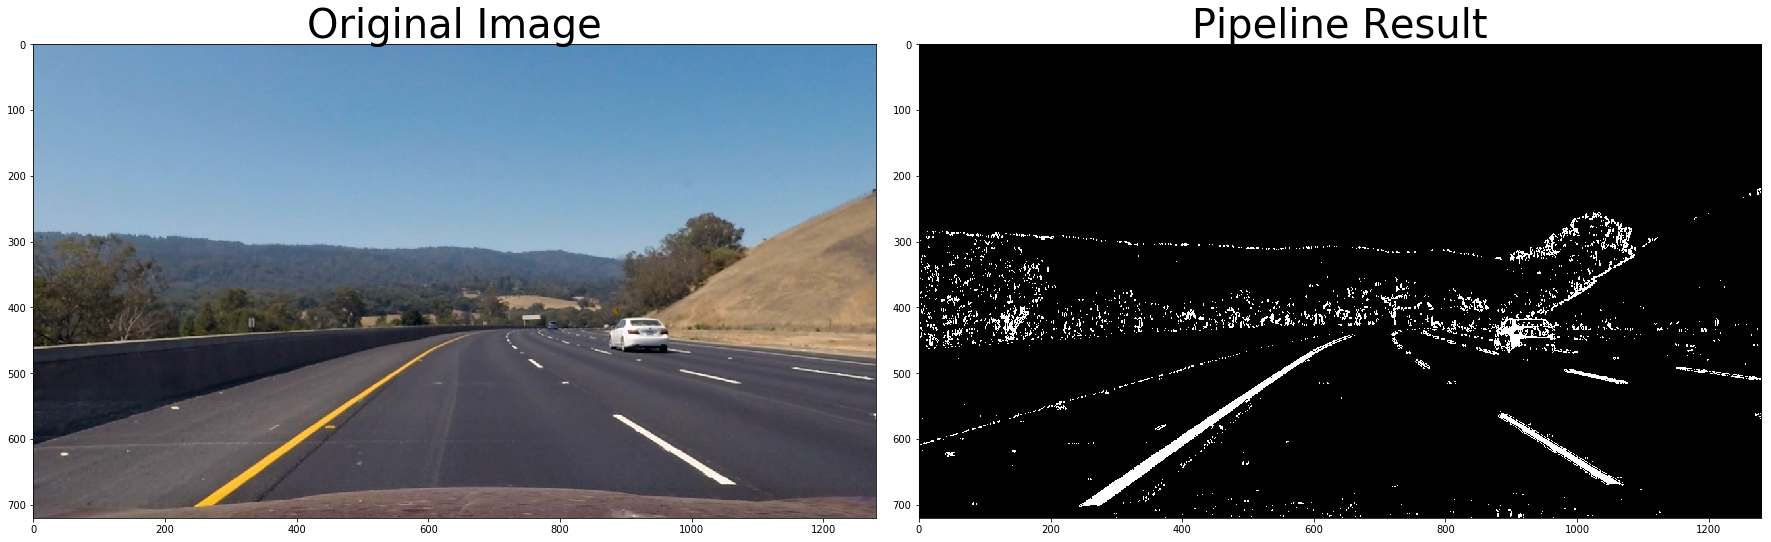

In [19]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(lane_undist)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result, cmap='gray')
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [20]:
# f.savefig('output_images/test5_binary.jpg')

In [21]:
img = lane_undist
ksize = 3
sobelx_thresh = (20, 100)

gradx = aahlpf.abs_sobel_thresh(img, orient='x', sobel_kernel=ksize, thresh=sobelx_thresh)

combined = np.zeros_like(gradx)
combined[(gradx == 1)] = 1

'''
f, ax1 = plt.subplots(1, 1, figsize=(24, 9))
f.tight_layout()
ax1.imshow(gradx, cmap='gray')
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
'''

"\nf, ax1 = plt.subplots(1, 1, figsize=(24, 9))\nf.tight_layout()\nax1.imshow(gradx, cmap='gray')\nplt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)\n"

In [22]:
img = lane_undist
s_thresh = (215, 240)

hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
s_channel = hls[:,:,2]

s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1

'''
f, ax1 = plt.subplots(1, 1, figsize=(24, 9))
f.tight_layout()
ax1.imshow(s_binary, cmap='gray')
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
'''

"\nf, ax1 = plt.subplots(1, 1, figsize=(24, 9))\nf.tight_layout()\nax1.imshow(s_binary, cmap='gray')\nplt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)\n"

In [23]:
img = lane_undist
r_thresh = (225, 255)

r = img[:,:,0]

r_binary = np.zeros_like(r)
r_binary[(r > r_thresh[0]) & (r <= r_thresh[1])] = 1

'''
f, ax1 = plt.subplots(1, 1, figsize=(24, 9))
f.tight_layout()
ax1.imshow(r_binary, cmap='gray')
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
'''

"\nf, ax1 = plt.subplots(1, 1, figsize=(24, 9))\nf.tight_layout()\nax1.imshow(r_binary, cmap='gray')\nplt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)\n"

In [24]:
combined = np.zeros_like(gradx)
combined[(gradx == 1)] = 1

color_combined = np.zeros_like(s_binary)
color_combined[(s_binary == 1) | (r_binary == 1)] = 1

color_binary = np.zeros_like(combined)
color_binary[(combined == 1) | (color_combined == 1)] = 1

'''
f, ax1 = plt.subplots(1, 1, figsize=(24, 9))
f.tight_layout()
ax1.imshow(color_binary, cmap='gray')
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
'''

"\nf, ax1 = plt.subplots(1, 1, figsize=(24, 9))\nf.tight_layout()\nax1.imshow(color_binary, cmap='gray')\nplt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)\n"

---
## Apply a perspective transform to rectify binary image

In [25]:
print(lane_images)

['test_images\\straight_lines1.jpg', 'test_images\\straight_lines2.jpg', 'test_images\\test1.jpg', 'test_images\\test2.jpg', 'test_images\\test3.jpg', 'test_images\\test4.jpg', 'test_images\\test5.jpg', 'test_images\\test6.jpg']


In [26]:
straight_lines1 = plt.imread(lane_images[0])
print(straight_lines1.shape)

(720, 1280, 3)


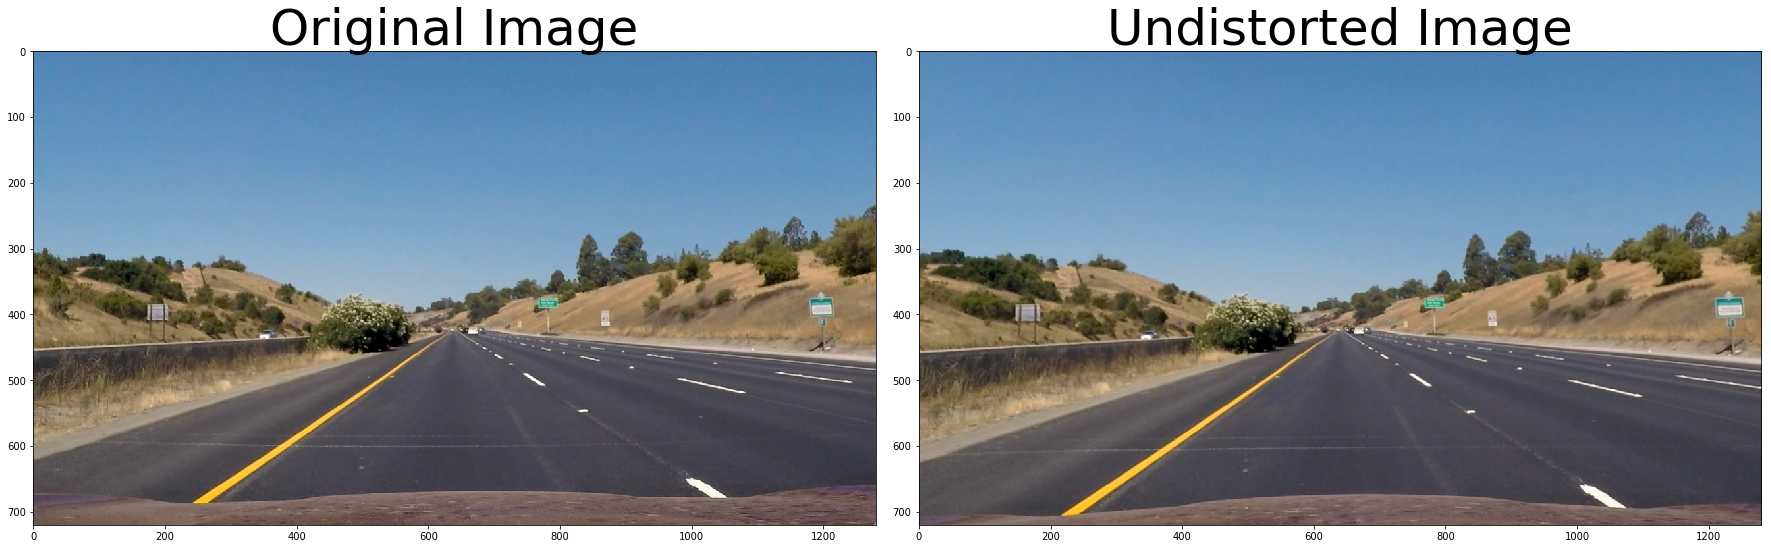

In [27]:
straight_lines1_undist = cv2.undistort(straight_lines1, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(straight_lines1)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(straight_lines1_undist)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [28]:
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 25     # minimum number of votes (intersections in Hough grid cell)
min_line_len = 25 #minimum number of pixels making up a line
max_line_gap = 25    # maximum gap in pixels between connectable line segments

In [29]:
trans_ratio = (80/128)
print(trans_ratio*straight_lines1.shape[0])

450.0


In [30]:
print(trans_ratio)

0.625


In [31]:
src, dst, edges = llhlpf.get_line_params_advanced(straight_lines1_undist, rho, theta, threshold, min_line_len, max_line_gap,
                                                 trans_im_h=trans_ratio, margin=300)

In [32]:
print(src)
print(dst)

[[ 205.  720.]
 [ 598.  450.]
 [ 681.  450.]
 [1116.  720.]]
[[300. 720.]
 [300.   0.]
 [980.   0.]
 [980. 720.]]


In [33]:
M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)

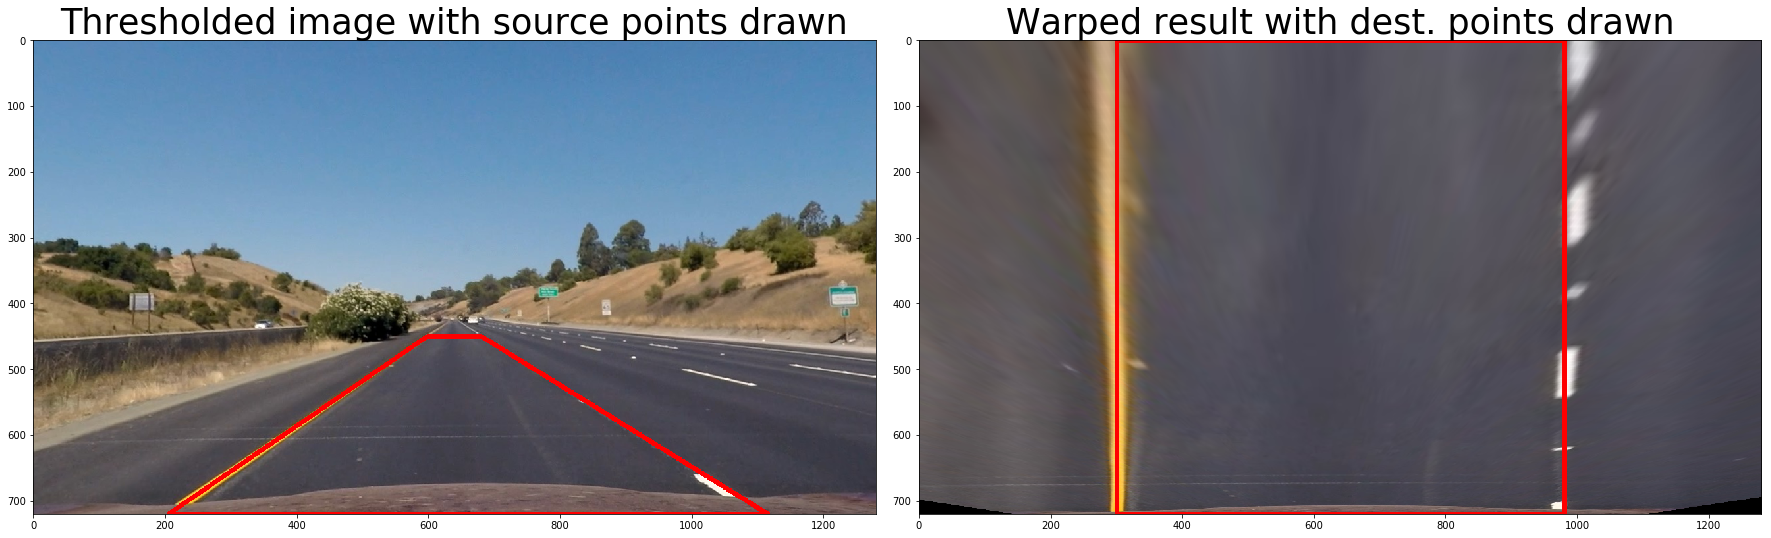

In [34]:
img_poly = straight_lines1_undist.copy()
vrx = np.int32(src)
vrx_reshape = vrx.reshape((-1,1,2))
cv2.polylines(img_poly, [vrx_reshape], True, (255, 0, 0), 5)

straight_lines1_warped = cv2.warpPerspective(
    straight_lines1_undist, M, (edges.shape[1], edges.shape[0]), flags=cv2.INTER_LINEAR)

img_warped_poly = straight_lines1_warped.copy()
vrx_warped = np.int32(dst)
vrx_warped_reshape = vrx_warped.reshape((-1,1,2))
cv2.polylines(img_warped_poly, [vrx_warped_reshape], True, (255, 0, 0), 5)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_poly)
ax1.set_title('Thresholded image with source points drawn', fontsize=35)
ax2.imshow(img_warped_poly)
ax2.set_title('Warped result with dest. points drawn', fontsize=35)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

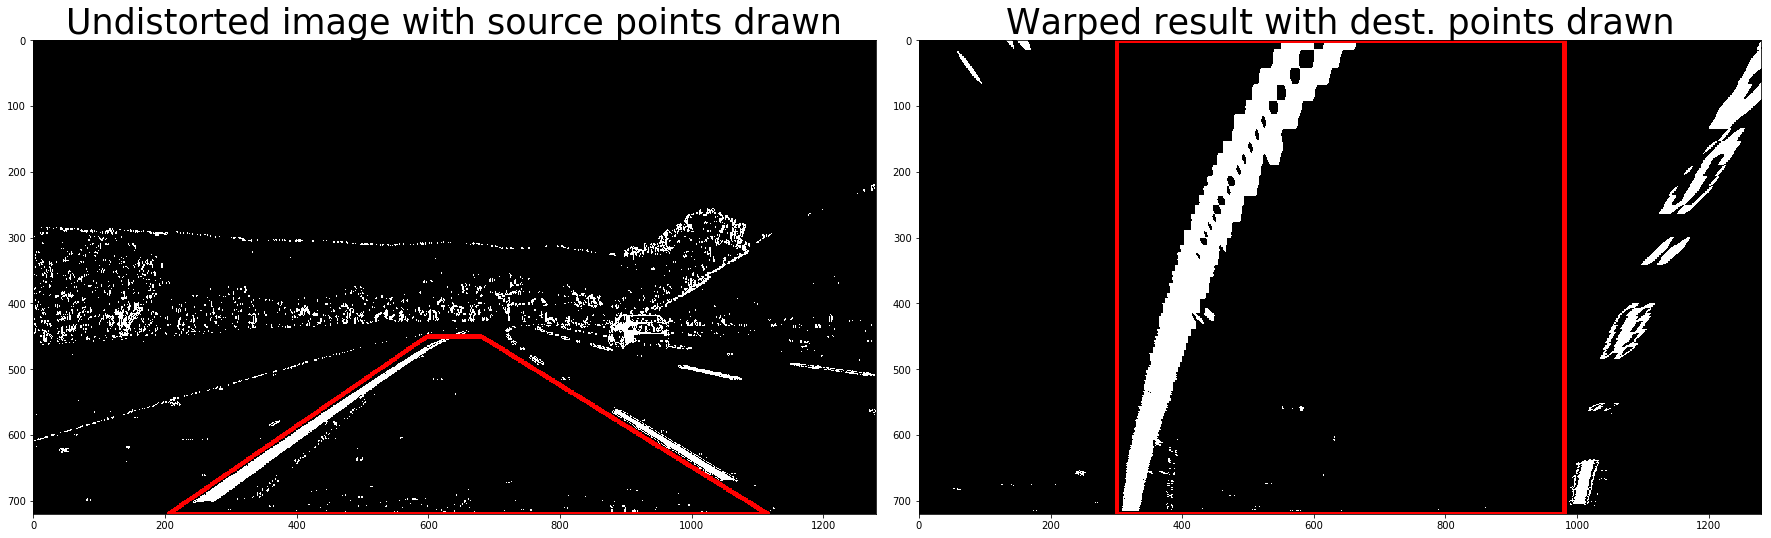

In [35]:
bin_img_poly = np.dstack((result, result, result))*255
vrx = np.int32(src)
vrx_reshape = vrx.reshape((-1,1,2))
cv2.polylines(bin_img_poly, [vrx_reshape], True, (255, 0, 0), 5)

result_warped = cv2.warpPerspective(
    result, M, (result.shape[1], result.shape[0]), flags=cv2.INTER_LINEAR)

bin_img_warped_poly = np.dstack((result_warped, result_warped, result_warped))*255
vrx_warped = np.int32(dst)
vrx_warped_reshape = vrx_warped.reshape((-1,1,2))
cv2.polylines(bin_img_warped_poly, [vrx_warped_reshape], True, (255, 0, 0), 5)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(bin_img_poly)
ax1.set_title('Undistorted image with source points drawn', fontsize=35)
ax2.imshow(bin_img_warped_poly)
ax2.set_title('Warped result with dest. points drawn', fontsize=35)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [36]:
# f.savefig('output_images/test5_warped.jpg')

---
## Detect lane pixels and fit to find the lane boundary

In [37]:
# Create histogram of image binary activations
histogram = aahlpf.hist(result_warped, h_frac=(3/4))

In [38]:
# Visualize the resulting histogram
'''
f, ax = plt.subplots(1, 1, figsize=(24, 9))
ax.plot(histogram)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
'''

'\nf, ax = plt.subplots(1, 1, figsize=(24, 9))\nax.plot(histogram)\nplt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)\n'

In [39]:
leftx, lefty, rightx, righty, out_img = aahlpf.find_lane_pixels(result_warped, h_frac=(3/4))

left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

left_xy, right_xy = aahlpf.fit_polynomial(result_warped, left_fit, right_fit)

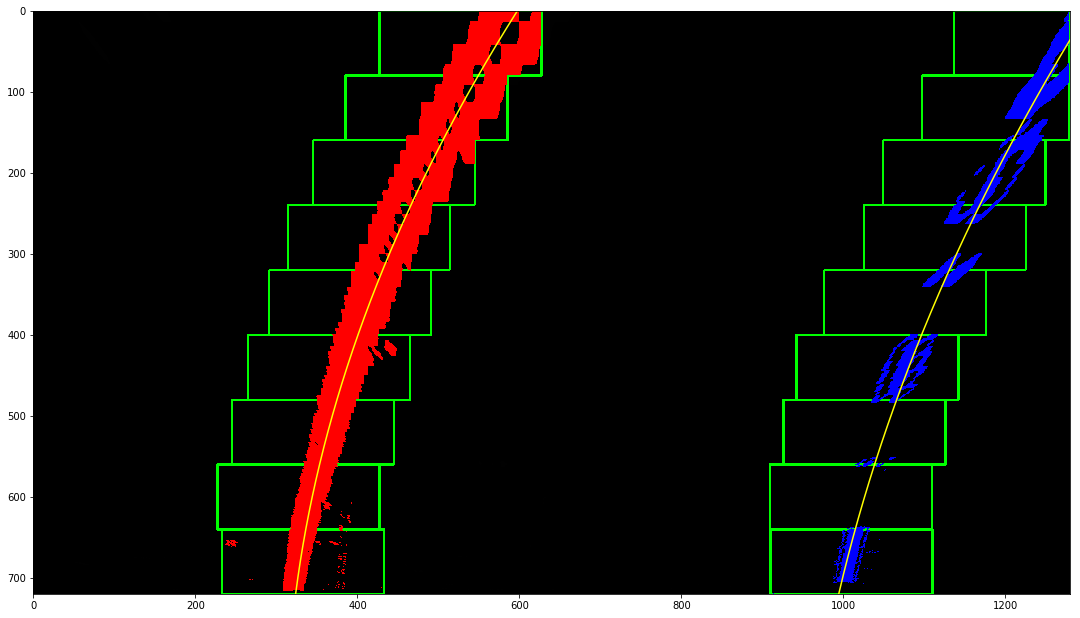

In [40]:
f, ax = plt.subplots(1, 1, figsize=(24, 9))
f.tight_layout()
ax.imshow(out_img)
ax.plot(left_xy[0], left_xy[1], color='yellow')
ax.plot(right_xy[0], right_xy[1], color='yellow')
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [41]:
# f.savefig('output_images/test5_detect_lane_slide.jpg')

In [42]:
# Find our lane pixels first
leftx, lefty, rightx, righty, out_img = aahlpf.find_lane_pixels(result_warped, h_frac=(3/4))

### TO-DO: Fit a second order polynomial to each using `np.polyfit` ###
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

# Run image through the pipeline
# Note that in your project, you'll also want to feed in the previous fits
leftx, lefty, rightx, righty, out_img = aahlpf.search_around_poly(result_warped, left_fit, right_fit)
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)
lane_pix_detect, left_xy, right_xy = aahlpf.visual_around_poly(result_warped, left_fit, right_fit, out_img)

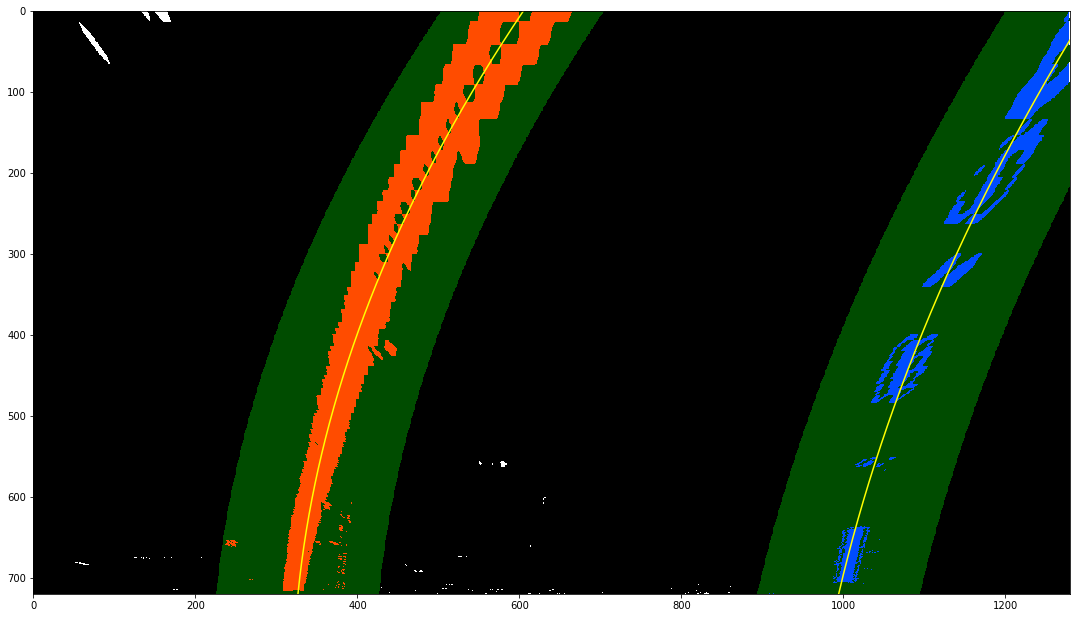

In [43]:
# View your output
f, ax = plt.subplots(1, 1, figsize=(24, 9))
f.tight_layout()
ax.imshow(lane_pix_detect)
plt.plot(left_xy[0], left_xy[1], color='yellow')
plt.plot(right_xy[0], right_xy[1], color='yellow')
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [44]:
# f.savefig('output_images/test5_detect_lane_prev.jpg')

In [45]:
leftx_conv, lefty_conv, rightx_conv, righty_conv, out_img_conv = aahlpf.find_lane_pixels_conv(result_warped, h_frac=(3/4))

left_fit_conv = np.polyfit(lefty_conv, leftx_conv, 2)
right_fit_conv = np.polyfit(righty_conv, rightx_conv, 2)

left_xy_conv, right_xy_conv = aahlpf.fit_polynomial(result_warped, left_fit_conv, right_fit_conv)

In [46]:
'''
f, ax = plt.subplots(1, 1, figsize=(24, 9))
f.tight_layout()
ax.imshow(out_img_conv)
ax.plot(left_xy_conv[0], left_xy_conv[1], color='yellow')
ax.plot(right_xy_conv[0], right_xy_conv[1], color='yellow')
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
'''

"\nf, ax = plt.subplots(1, 1, figsize=(24, 9))\nf.tight_layout()\nax.imshow(out_img_conv)\nax.plot(left_xy_conv[0], left_xy_conv[1], color='yellow')\nax.plot(right_xy_conv[0], right_xy_conv[1], color='yellow')\nplt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)\n"

---
## Determine the curvature of the lane and vehicle position with respect to center

In [47]:
# Find our lane pixels first
leftx, lefty, rightx, righty, out_img = aahlpf.find_lane_pixels(result_warped, h_frac=(3/4))

### TO-DO: Fit a second order polynomial to each using `np.polyfit` ###
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

# Generate x and y values for plotting
ploty = np.linspace(0, result_warped.shape[0]-1, result_warped.shape[0] )

# Calculate the radius of curvature in pixels for both lane lines
left_curverad, right_curverad = aahlpf.measure_curvature_pixels(ploty, left_fit, right_fit)

In [48]:
# print(left_curverad, right_curverad)

In [49]:
y_eval = np.max(ploty)

left_fitx_eval = left_fit[0]*y_eval**2 + left_fit[1]*y_eval + left_fit[2]
right_fitx_eval = right_fit[0]*y_eval**2 + right_fit[1]*y_eval + right_fit[2]

lane_center = np.abs(left_fitx_eval - right_fitx_eval)/2 + left_fitx_eval

vehicle_center = result_warped.shape[1]/2

vehicle_pos = vehicle_center - lane_center

In [50]:
# print('Vehicle Position: ', vehicle_pos)

In [51]:
# Find our lane pixels first
leftx, lefty, rightx, righty, out_img = aahlpf.find_lane_pixels(result_warped, h_frac=(3/4))

ym_per_pix=(30/720)
xm_per_pix=(3.7/700)

### TO-DO: Fit a second order polynomial to each using `np.polyfit` ###
left_fit_m = np.polyfit(ym_per_pix*lefty, xm_per_pix*leftx, 2)
right_fit_m = np.polyfit(ym_per_pix*righty, xm_per_pix*rightx, 2)

# Generate x and y values for plotting
ploty = np.linspace(0, result_warped.shape[0]-1, result_warped.shape[0] )

# Calculate the radius of curvature in pixels for both lane lines
left_curverad_m, right_curverad_m = aahlpf.measure_curvature_real(ploty, left_fit_m, right_fit_m)

In [52]:
# print(left_curverad_m, 'm', right_curverad_m, 'm')

In [53]:
print(left_curverad_m/right_curverad_m)
print(right_curverad_m/left_curverad_m)

0.7687111808587435
1.3008786978782838


In [54]:
y_eval = np.max(ploty)
y_m = y_eval*ym_per_pix

left_fitx_eval_m = left_fit_m[0]*y_m**2 + left_fit_m[1]*y_m + left_fit_m[2]
right_fitx_eval_m = right_fit_m[0]*y_m**2 + right_fit_m[1]*y_m + right_fit_m[2]

lane_center_m = np.abs(left_fitx_eval_m - right_fitx_eval_m)/2 + left_fitx_eval_m

vehicle_center_m = xm_per_pix*result_warped.shape[1]/2

vehicle_pos_m = vehicle_center_m - lane_center_m

In [55]:
# print('Vehicle Position (m): ', xm_per_pix*vehicle_pos)

In [56]:
lane_width_bottom = np.abs(left_fitx_eval - right_fitx_eval)
print(lane_width_bottom)

670.5841996948775


In [57]:
y_min = np.min(ploty)

left_fitx_eval_min = left_fit[0]*y_min**2 + left_fit[1]*y_min + left_fit[2]
right_fitx_eval_min = right_fit[0]*y_min**2 + right_fit[1]*y_min + right_fit[2]

lane_width_top = np.abs(left_fitx_eval_min - right_fitx_eval_min)
print(lane_width_top)

704.1634075492692


In [58]:
print(np.abs(lane_width_bottom - lane_width_top))

33.57920785439171


In [59]:
print(left_fit)
print(right_fit)

[ 3.48848130e-04 -6.31219280e-01  5.97240321e+02]
[ 2.68409537e-04 -6.20086585e-01  1.30140373e+03]


---
## Warp the detected lane boundaries back onto the original image

In [60]:
# Create an image to draw the lines on
warp_zero = np.zeros_like(result_warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_xy[0], left_xy[1]]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_xy[0], right_xy[1]])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (lane_undist.shape[1], lane_undist.shape[0]))

# Combine the result with the original image
result_lane = cv2.addWeighted(lane_undist, 1, newwarp, 0.3, 0)

In [61]:
'''
f, ax = plt.subplots(1, 1, figsize=(24, 9))
f.tight_layout()
ax.imshow(result_lane)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
'''

'\nf, ax = plt.subplots(1, 1, figsize=(24, 9))\nf.tight_layout()\nax.imshow(result_lane)\nplt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)\n'

---
## Output visual display of lane boundaries and lane curvature and vehicle position estimations

In [62]:
text1 = "Left Lane Curvature: " + str(left_curverad_m) + " m"
text2 = "Right Lane Curvature: " + str(right_curverad_m) + " m"
text3 = "Vehicle Position: " + str(xm_per_pix*vehicle_pos) + " m"
fontFace = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1.5;
thickness = 2;

img = np.copy(result_lane)

In [63]:
baseline=0;
textSize1, baseline1 = cv2.getTextSize(text1, fontFace, fontScale, thickness);
textSize2, baseline2 = cv2.getTextSize(text2, fontFace, fontScale, thickness);
textSize3, baseline3 = cv2.getTextSize(text3, fontFace, fontScale, thickness);

In [64]:
# center the text
textOrg1 = ((img.shape[1] - textSize1[0] - baseline1), (textSize1[1] + baseline1))
textOrg2 = ((img.shape[1] - textSize2[0] - baseline2),
            (textSize1[1] + baseline1 + textSize2[1] + baseline2))
textOrg3 = ((img.shape[1] - textSize3[0] - baseline3),
            (textSize1[1] + baseline1 + textSize2[1] + baseline2 + textSize3[1] + baseline3))

In [65]:
# then put the text itself
cv2.putText(img, text1, textOrg1, fontFace, fontScale, (255, 255, 255), thickness, 8);
cv2.putText(img, text2, textOrg2, fontFace, fontScale, (255, 255, 255), thickness, 8);
cv2.putText(img, text3, textOrg3, fontFace, fontScale, (255, 255, 255), thickness, 8);

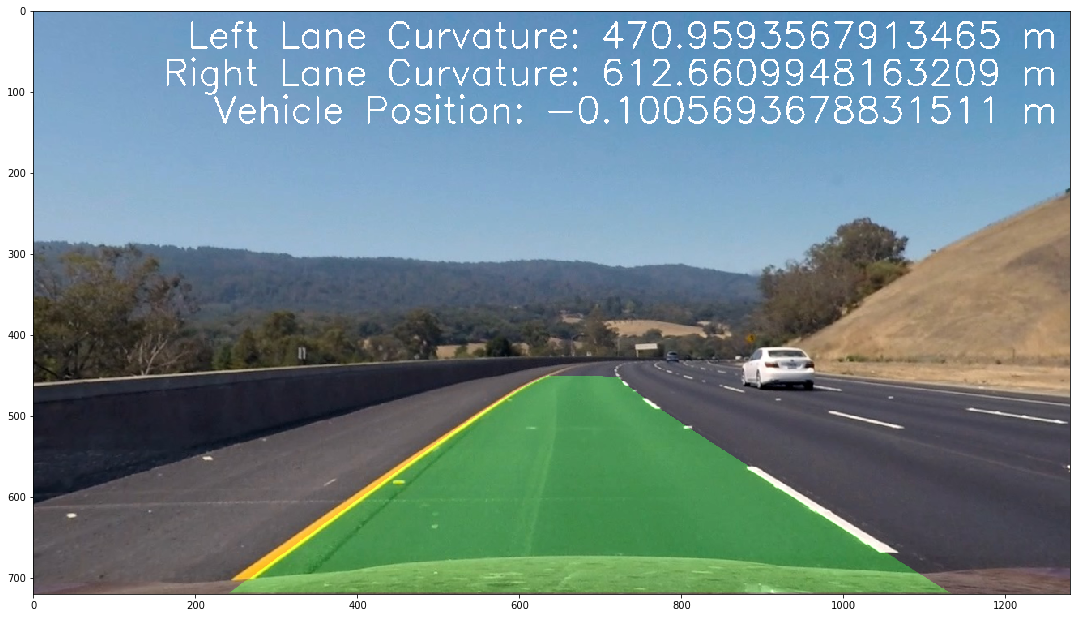

In [66]:
f, ax = plt.subplots(1, 1, figsize=(24, 9))
f.tight_layout()
ax.imshow(img)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [67]:
# f.savefig('output_images/test5_curve_pos.jpg')

---
## Process Video

In [68]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [69]:
right_line = None
left_line = None

In [70]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    
    global left_line
    global right_line
    global M
    global Minv
    
    n = 3
    
    # Apply a distortion correction to raw images
    image_undist = cv2.undistort(image, mtx, dist, None, mtx)
    
    # Use color transforms, gradients, etc., to create a thresholded binary image
    binary_image = aahlpf.pipeline(image_undist)
    
    # Apply a perspective transform to rectify binary image ("birds-eye view")
    binary_warped = cv2.warpPerspective(binary_image, M, (binary_image.shape[1], binary_image.shape[0]),
                                        flags=cv2.INTER_LINEAR)
    
    # Have lane lines been detected previously?
    try:
        right_line
    except NameError:
        right_line = None
        left_line = None
    
    # print(right_line)
    # print(left_line)
    
    # Detect lane pixels and fit to find the lane boundary
    if right_line is None:
        
        # Sliding window
        leftx, lefty, rightx, righty, out_img = aahlpf.find_lane_pixels(binary_warped, h_frac=(3/4))
        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx, 2)
        left_xy, right_xy = aahlpf.fit_polynomial(binary_warped, left_fit, right_fit)
        
        # Save info about detected lane lines
        is_detected = True
        
        # Save info about detected lane lines
        ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0])
        # Fit x values
        left_fitx_full = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx_full = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
        
    else:
        
        # Search around polynomial
        leftx, lefty, rightx, righty, out_img = aahlpf.search_around_poly(
            binary_warped, left_line.best_fit, right_line.best_fit)
        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx, 2)
        
        # Sanity check
        # Find lane width
        # Lane width at bottom of image
        # Lane width at top of image
        ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0])
        is_detected, lane_width, lane_width_min = aahlpf.sanity_check(
            ploty, left_fit, right_fit, leftx, lefty, rightx, righty,
            thresh_lane=(600, 800), thresh_lane_diff=200, thresh_curve=(7.0/4))
        
        # Check fails
        if not is_detected:
            
            # Sliding window
            leftx, lefty, rightx, righty, out_img = aahlpf.find_lane_pixels(binary_warped, h_frac=(3/4))
            left_fit = np.polyfit(lefty, leftx, 2)
            right_fit = np.polyfit(righty, rightx, 2)
        
        # Sanity check
        # Find lane width
        # Lane width at bottom of image
        # Lane width at top of image
        ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0])
        is_detected, lane_width, lane_width_min = aahlpf.sanity_check(
            ploty, left_fit, right_fit, leftx, lefty, rightx, righty,
            thresh_lane=(600, 800), thresh_lane_diff=200, thresh_curve=(7.0/4))
        
        # Check doesn't fail
        if is_detected:
            
            # Save info about detected lane lines
            #x values for detected line pixels
            right_line.allx.append(rightx)
            #y values for detected line pixels
            right_line.ally.append(righty)
            #x values for detected line pixels
            left_line.allx.append(leftx)
            #y values for detected line pixels
            left_line.ally.append(lefty)
            
            # Save info about detected lane lines
            ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0])
            # Fit x values
            left_fitx_full = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
            right_fitx_full = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
            
            # Save info about detected lane lines
            # x values of the last n fits of the line
            while(len(right_line.recent_xfitted) >= n):
                del right_line.recent_xfitted[0]
            right_line.recent_xfitted.append(right_fitx_full)
            # x values of the last n fits of the line
            while(len(left_line.recent_xfitted) >= n):
                del left_line.recent_xfitted[0]
            left_line.recent_xfitted.append(left_fitx_full)
        
        # Average results from previous frames
        leftx = []
        lefty = []
        rightx = []
        righty = []
        n_min = np.minimum(n, len(left_line.allx))
        
        # Average results from previous frames
        for i in range(n_min):
            leftx.append(left_line.allx[-1 - i])
            lefty.append(left_line.ally[-1 - i])
            rightx.append(right_line.allx[-1 - i])
            righty.append(right_line.ally[-1 - i])
        
        # Average results from previous frames
        leftx = np.concatenate(leftx)
        lefty = np.concatenate(lefty)
        rightx = np.concatenate(rightx)
        righty = np.concatenate(righty)
        
        # Average results from previous frames
        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx, 2)
        left_xy, right_xy = aahlpf.fit_polynomial(binary_warped, left_fit, right_fit)
        
        # Save info about detected lane lines
        ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0])
        # Fit x values
        left_fitx_full = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx_full = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    # Determine the curvature of the lane
    ym_per_pix=(30/720)
    xm_per_pix=(3.7/700)
    left_fit_m = np.polyfit(ym_per_pix*lefty, xm_per_pix*leftx, 2)
    right_fit_m = np.polyfit(ym_per_pix*righty, xm_per_pix*rightx, 2)
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0])
    left_curverad_m, right_curverad_m = aahlpf.measure_curvature_real(ploty, left_fit_m, right_fit_m)
    
    # Determine the vehicle position with respect to center
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0])
    y_eval = np.max(ploty)
    left_fitx_eval = left_fit[0]*y_eval**2 + left_fit[1]*y_eval + left_fit[2]
    right_fitx_eval = right_fit[0]*y_eval**2 + right_fit[1]*y_eval + right_fit[2]
    lane_center = np.abs(left_fitx_eval - right_fitx_eval)/2 + left_fitx_eval
    vehicle_center = binary_warped.shape[1]/2
    vehicle_pos = vehicle_center - lane_center
    vehicle_pos_m = xm_per_pix*vehicle_pos
    
    # Warp the detected lane boundaries back onto the original image
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    pts_left = np.array([np.transpose(np.vstack([left_xy[0], left_xy[1]]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_xy[0], right_xy[1]])))])
    pts = np.hstack((pts_left, pts_right))
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    newwarp = cv2.warpPerspective(color_warp, Minv, (image_undist.shape[1], image_undist.shape[0]))
    image_lane_detect = cv2.addWeighted(image_undist, 1, newwarp, 0.3, 0)
    
    # Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position
    text1 = "Left Lane Curvature: " + str(left_curverad_m) + "m"
    text2 = "Right Lane Curvature: " + str(right_curverad_m) + "m"
    text3 = "Vehicle Position: " + str(vehicle_pos_m) + "m"
    fontFace = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 1.5;
    thickness = 2;
    image_est = np.copy(image_lane_detect)
    textSize1, baseline1 = cv2.getTextSize(text1, fontFace, fontScale, thickness);
    textSize2, baseline2 = cv2.getTextSize(text2, fontFace, fontScale, thickness);
    textSize3, baseline3 = cv2.getTextSize(text3, fontFace, fontScale, thickness);
    textOrg1 = ((image_est.shape[1] - textSize1[0] - baseline1), (textSize1[1] + baseline1))
    textOrg2 = ((image_est.shape[1] - textSize2[0] - baseline2),
                (textSize1[1] + baseline1 + textSize2[1] + baseline2))
    textOrg3 = ((image_est.shape[1] - textSize3[0] - baseline3),
                (textSize1[1] + baseline1 + textSize2[1] + baseline2 + textSize3[1] + baseline3))
    cv2.putText(image_est, text1, textOrg1, fontFace, fontScale, (255, 255, 255), thickness, 8);
    cv2.putText(image_est, text2, textOrg2, fontFace, fontScale, (255, 255, 255), thickness, 8);
    cv2.putText(image_est, text3, textOrg3, fontFace, fontScale, (255, 255, 255), thickness, 8);
    
    # Save info about detected lane lines
    if right_line is None:
        
        right_line = aahlpf.Line()
        # was the line detected in the last iteration?
        right_line.detected = True
        # x values of the last n fits of the line
        right_line.recent_xfitted.append(right_fitx_full)
        #average x values of the fitted line over the last n iterations
        right_line.bestx = right_fitx_full
        #polynomial coefficients averaged over the last n iterations
        right_line.best_fit = right_fit
        #polynomial coefficients for the most recent fit
        right_line.current_fit = right_fit
        #radius of curvature of the line in meters
        right_line.radius_of_curvature = right_curverad_m
        #distance in meters of vehicle center from the line
        right_line.line_base_pos = vehicle_pos_m
        #difference in fit coefficients between last and new fits
        # right_line.diffs = np.array([0,0,0], dtype='float')
        #x values for detected line pixels
        right_line.allx = []
        right_line.allx.append(rightx)
        #y values for detected line pixels
        right_line.ally = []
        right_line.ally.append(righty)
        
        left_line = aahlpf.Line()
        # was the line detected in the last iteration?
        left_line.detected = True
        # x values of the last n fits of the line
        left_line.recent_xfitted.append(left_fitx_full)
        #average x values of the fitted line over the last n iterations
        left_line.bestx = left_fitx_full
        #polynomial coefficients averaged over the last n iterations
        left_line.best_fit = left_fit
        #polynomial coefficients for the most recent fit
        left_line.current_fit = left_fit
        #radius of curvature of the line in meters
        left_line.radius_of_curvature = left_curverad_m
        #distance in meters of vehicle center from the line
        left_line.line_base_pos = vehicle_pos_m
        #difference in fit coefficients between last and new fits
        left_line.diffs = np.array([0,0,0], dtype='float')
        #x values for detected line pixels
        left_line.allx = []
        left_line.allx.append(leftx)
        #y values for detected line pixels
        left_line.ally = []
        left_line.ally.append(lefty)
        
    else:
        
        # was the line detected in the last iteration?
        right_line.detected = is_detected
        # x values of the last n fits of the line
        '''
        while(len(right_line.recent_xfitted) >= n):
            del right_line.recent_xfitted[0]
        right_line.recent_xfitted.append(right_fitx_full)
        '''
        #average x values of the fitted line over the last n iterations
        '''
        right_fitx_cat = np.vstack(right_line.recent_xfitted)
        right_fitx_ave = np.mean(right_fitx_cat, axis=0)
        right_line.bestx = right_fitx_ave
        '''
        right_line.bestx = right_fitx_full
        #polynomial coefficients averaged over the last n iterations
        right_line.best_fit = right_fit
        #polynomial coefficients for the most recent fit
        right_fit_last = right_line.current_fit
        right_line.current_fit = right_fit
        #radius of curvature of the line in meters
        right_line.radius_of_curvature = right_curverad_m
        #distance in meters of vehicle center from the line
        right_line.line_base_pos = vehicle_pos_m
        #difference in fit coefficients between last and new fits
        right_line.diffs = np.abs(right_fit_last - right_fit)
        #x values for detected line pixels
        # right_line.allx.append(rightx)
        #y values for detected line pixels
        # right_line.ally.append(righty)
        
        # was the line detected in the last iteration?
        left_line.detected = is_detected
        # x values of the last n fits of the line
        '''
        while(len(left_line.recent_xfitted) >= n):
            del left_line.recent_xfitted[0]
        left_line.recent_xfitted.append(left_fitx_full)
        '''
        #average x values of the fitted line over the last n iterations
        '''
        left_fitx_cat = np.vstack(left_line.recent_xfitted)
        left_fitx_ave = np.mean(left_fitx_cat, axis=0)
        left_line.bestx = left_fitx_ave
        '''
        left_line.bestx = left_fitx_full
        #polynomial coefficients averaged over the last n iterations
        left_line.best_fit = left_fit
        #polynomial coefficients for the most recent fit
        left_fit_last = left_line.current_fit
        left_line.current_fit = left_fit
        #radius of curvature of the line in meters
        left_line.radius_of_curvature = left_curverad_m
        #distance in meters of vehicle center from the line
        left_line.line_base_pos = vehicle_pos_m
        #difference in fit coefficients between last and new fits
        left_line.diffs = np.abs(left_fit_last - left_fit)
        #x values for detected line pixels
        # left_line.allx.append(leftx)
        #y values for detected line pixels
        # left_line.ally.append(lefty)
    
    return image_est

In [71]:
print(len(lane_images))
print(lane_images)

8
['test_images\\straight_lines1.jpg', 'test_images\\straight_lines2.jpg', 'test_images\\test1.jpg', 'test_images\\test2.jpg', 'test_images\\test3.jpg', 'test_images\\test4.jpg', 'test_images\\test5.jpg', 'test_images\\test6.jpg']


In [72]:
im_num = 5
print(lane_images[im_num])
lane_image = mpimg.imread(lane_images[im_num])

test_images\test4.jpg


In [73]:
test_output = process_image(lane_image)

In [74]:
print(len( left_line.recent_xfitted))
print(len(right_line.allx))
print(left_line.best_fit)

1
1
[ 2.30898644e-04 -3.00368386e-01  4.42493590e+02]


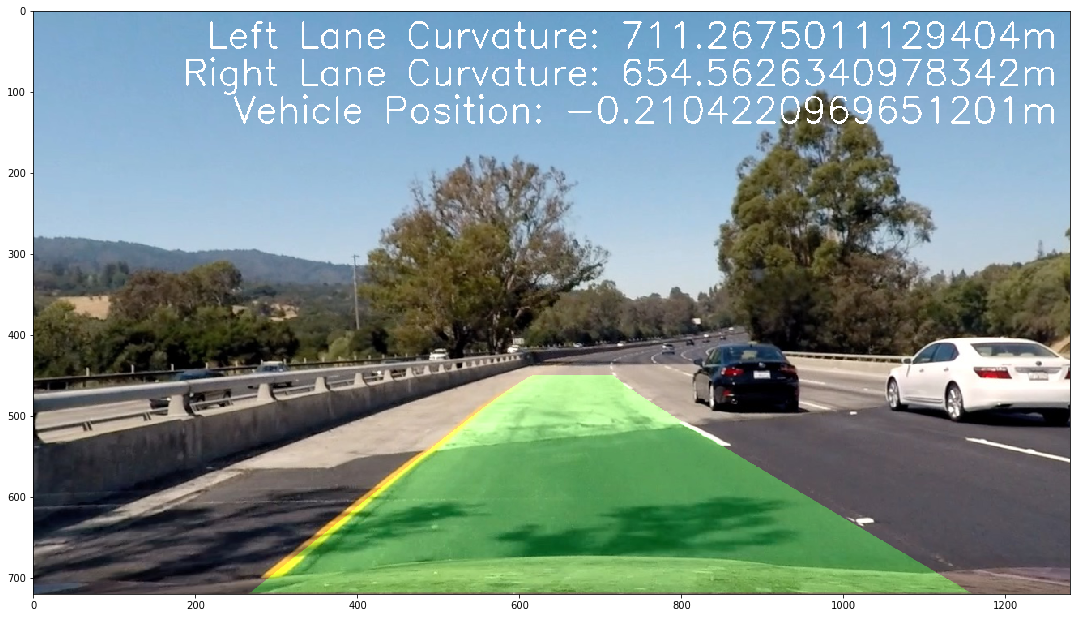

In [75]:
f, ax = plt.subplots(1, 1, figsize=(24, 9))
f.tight_layout()
ax.imshow(test_output)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [77]:
output = 'output_videos/project_video_out.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("project_video.mp4")
clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time clip.write_videofile(output, audio=False)

Moviepy - Building video output_videos/project_video_out.mp4.


Moviepy - Writing video output_videos/project_video_out.mp4



t:  11%|███████                                                           | 135/1260 [02:19<19:13,  1.03s/it, now=None]


t:  22%|██████████████▏                                                   | 271/1260 [04:48<19:21,  1.17s/it, now=None]


t:  32%|█████████████████████▎                                            | 407/1260 [07:24<15:32,  1.09s/it, now=None]


t:  43%|████████████████████████████▍                                     | 543/1260 [10:10<11:05,  1.08it/s, now=None]


t:  54%|███████████████████████████████████▌                              | 679/1260 [12:11<11:19,  1.17s/it, now=None]


t:  65%|██████████████████████████████████████████▋                       | 815/1260 [14:46<08:26,  1.14s/it, now=None]


t:  75%|█████████████████████████████████████████████████▊                | 951/1260 [17:20<05:28,  1.06s/it, now=None]


t:  86%|████████████████████████████████████████████████████████         | 1087/1260 [19:34<03:05,  1.07s/it, now=None]


t:  97%|███████████████████████████████████████████████████████████████  | 1223/1260 [22:04<00:37,  1.02s/it, now=None]


t: 100%|█████████████████████████████████████████████████████████████████| 1260/1260 [22:45<00:00,  1.17s/it, now=None]


Moviepy - Done !


Moviepy - video ready output_videos/project_video_out.mp4


t:   0%|                                                                    | 2/1260 [24:35<10:59,  1.91it/s, now=None]

Wall time: 22min 47s


In [78]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output))